# Importing required Libraries

In [1]:
#--importing required libraries-----------
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
from collections import Counter

## Reading the news dataset input file

In [2]:
data = pd.ExcelFile('News Dataset.xlsx')
df_nd = data.parse("train")


In [3]:
# reading first 10 rows
df_nd.head(10)

,text,category,sentiment,offensive
0,കൊച്ചി ചെരുപ്പ് വിതരണ കേന്ദ്രത്തിലെ തീപിടിത്തം...,business,negative,Offensive
1,ഈ​​​സ്റ്റേ​​​ണ്‍ ക​​​റി പൗ​​​ഡ​​​റി​​​ന് പു​​​...,business,positive,Not Offensive
2,ശ്രീശാന്തിന്റെ ആജീവനാന്ത വിലക്ക് പിന്‍വലിച്ചു,sports,positive,Not Offensive
3,റയല്‍ മാഡ്രിഡിനെ ഞെട്ടിച്ച യുവതാരം ബ്രസീല്‍ ടീ...,sports,positive,Not Offensive
4,"എനിക്ക് ശ്രീനിവാസന്‍ ആകേണ്ട, ലോഹിതദാസ് മതി : ക...",entertainment,neutral,Offensive
5,"മുല്ലപ്പൂ വിപ്ലവം ഇന്നു മുതല്‍, തിയറ്റര്‍ ലിസ്...",entertainment,positive,NaN
6,'അനാന്‍' ചിത്രത്തിന്‍റെ പുതിയ പോസ്റ്റര്‍ പുറത്...,entertainment,positive,NaN
7,മുകേഷ് അംബാനി കുതിക്കുന്നു,business,positive,NaN
8,കിസാന്‍ സമ്മാന്‍ നിധിക്കായി സംസ്ഥാനത്തെ കൃഷിഭവ...,business,positive,NaN
9,\nഒടുവില്‍ ടി വി ചന്ദ്രന്‍ അയ്യപ്പനോടുള്ള വാക്...,entertainment,positive,NaN


In [4]:
# Number of rows and columns
nRow, nCol = df_nd.shape
print(f'There are {nRow} rows and {nCol} columns in news dataset')

There are 5036 rows and 4 columns in news dataset


## Reading youtube comment dataset

In [5]:
df_yc = pd.read_csv('youtube_comments_dataset.csv')

# reading first 10 rows
df_yc.head(10)

,text,category,sentiment,offensive
0,ഇത്തരം വനജീവികളെ വീട്ടിൽ വളർത്തുന്നവരോട് പറയ...,Pets_and_Animals,negative,0
1,ജീവിതത്തിൽ പലപ്പോഴും തോന്നിട്ടുണ്ട് സുഹൃത്തുക...,Pets_and_Animals,positive,0
2,ഈ പൂച്ച കുട്ടിയെ ഞങ്ങളാ വാങ്ങിയത് സുറുമി എന്ന ...,Pets_and_Animals,positive,0
3,അവന്റെ കണ്ണുകളിൽ അന്നു കണ്ട ദയനീയത കണ്ടവർക്ക് ...,Pets_and_Animals,positive,0
4,പൊള്ളിയാലോ ഗ്രീൻ ഗപ്പി ഫുഡ് ഈ വിഡിയോ ഇട്ട ...,Pets_and_Animals,positive,0
5,ജാസ്മിനിൽ പൂർണമായി ആ വൈരാഗ്യം അവസാനിക്കും എന്...,Pets_and_Animals,negative,0
6,പൊന്നേട്ടൻ വിശേഷങ്ങൾ നന്നായി പോകുന്നുണ്ട് ട്ടോ...,Pets_and_Animals,positive,0
7,ഗുരുവായൂർ കണ്ണന്റെ ഇന്ദ്രസേൻ ഗജരത്നം പത്മനാഭന്...,Pets_and_Animals,positive,0
8,ചെരിഞ്ഞപ്പോൾ ആദരാഞ്ജലികൾ ഇടാൻ എല്ലാവരുമുണ്ട് ഇ...,Pets_and_Animals,negative,0
9,ടീം നോക്കാതെ ക്രിക്കറ്റ് കണ്ടിരുന്ന കാലം 260 പ...,Sports,positive,0


In [6]:
# Number of rows and columns
nRow, nCol = df_yc.shape
print(f'There are {nRow} rows and {nCol} columns in youtube comments dataset')

There are 6105 rows and 4 columns in youtube comments dataset


### Plotting the sentiments in the news and youtube comment dataset

Text(0.5, 0, 'Sentiments')

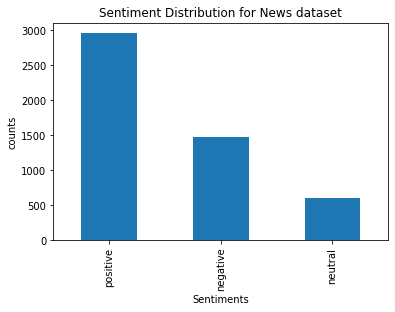

In [7]:
plt.title("Sentiment Distribution for News dataset")
plt.ylabel('counts')
df_nd['sentiment'].value_counts().plot.bar()
plt.xlabel('Sentiments')

In [8]:
df_nd.sentiment.value_counts()

positive    2962
negative    1473
neutral      601
Name: sentiment, dtype: int64

Text(0.5, 0, 'Sentiments')

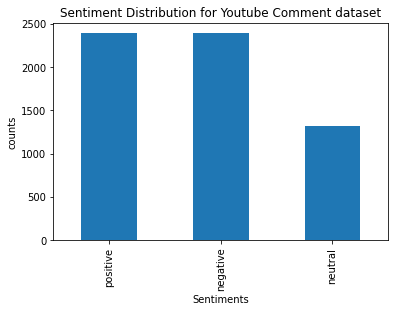

In [9]:
plt.title("Sentiment Distribution for Youtube Comment dataset")
plt.ylabel('counts')
df_yc['sentiment'].value_counts().plot.bar()
plt.xlabel('Sentiments')

In [10]:
df_yc.sentiment.value_counts()

positive    2394
negative    2391
neutral     1320
Name: sentiment, dtype: int64

### Appending the neutral values from youtube comments to the news dataset

In [11]:
df_neutral_yc=df_yc.loc[df_yc['sentiment'] == 'neutral']

In [12]:
df = df_nd.append(df_neutral_yc.head(800))

In [13]:
# Number of rows and columns
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns in youtube comments dataset')

There are 5836 rows and 4 columns in youtube comments dataset


In [14]:
df.head(10)

,text,category,sentiment,offensive
0,കൊച്ചി ചെരുപ്പ് വിതരണ കേന്ദ്രത്തിലെ തീപിടിത്തം...,business,negative,Offensive
1,ഈ​​​സ്റ്റേ​​​ണ്‍ ക​​​റി പൗ​​​ഡ​​​റി​​​ന് പു​​​...,business,positive,Not Offensive
2,ശ്രീശാന്തിന്റെ ആജീവനാന്ത വിലക്ക് പിന്‍വലിച്ചു,sports,positive,Not Offensive
3,റയല്‍ മാഡ്രിഡിനെ ഞെട്ടിച്ച യുവതാരം ബ്രസീല്‍ ടീ...,sports,positive,Not Offensive
4,"എനിക്ക് ശ്രീനിവാസന്‍ ആകേണ്ട, ലോഹിതദാസ് മതി : ക...",entertainment,neutral,Offensive
5,"മുല്ലപ്പൂ വിപ്ലവം ഇന്നു മുതല്‍, തിയറ്റര്‍ ലിസ്...",entertainment,positive,NaN
6,'അനാന്‍' ചിത്രത്തിന്‍റെ പുതിയ പോസ്റ്റര്‍ പുറത്...,entertainment,positive,NaN
7,മുകേഷ് അംബാനി കുതിക്കുന്നു,business,positive,NaN
8,കിസാന്‍ സമ്മാന്‍ നിധിക്കായി സംസ്ഥാനത്തെ കൃഷിഭവ...,business,positive,NaN
9,\nഒടുവില്‍ ടി വി ചന്ദ്രന്‍ അയ്യപ്പനോടുള്ള വാക്...,entertainment,positive,NaN


Text(0.5, 0, 'Sentiments')

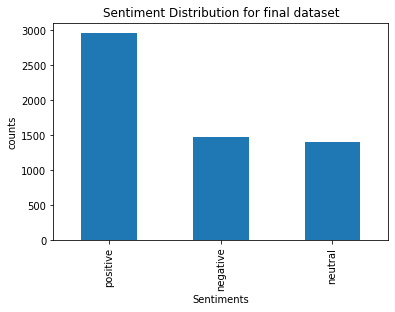

In [15]:
plt.title("Sentiment Distribution for final dataset")
plt.ylabel('counts')
df['sentiment'].value_counts().plot.bar()
plt.xlabel('Sentiments')

In [16]:
df.sentiment.value_counts()

positive    2962
negative    1473
neutral     1401
Name: sentiment, dtype: int64

In [17]:
# Number of rows and columns
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns in final dataset')

There are 5836 rows and 4 columns in final dataset


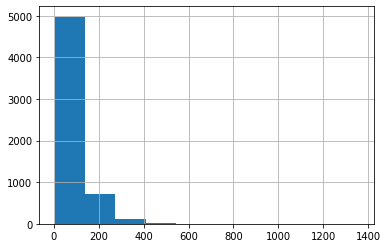

count    5836.000000
mean       95.149589
std        68.139708
min         4.000000
25%        57.000000
50%        78.000000
75%       107.000000
max      1358.000000
dtype: float64

In [18]:
text_len = [len(x) for x in df['text']]
pd.Series(text_len).hist()
plt.show()
pd.Series(text_len).describe()

### Number of words

In [19]:
df['number_of_words'] = [len(tw.split()) for tw in df.text]
df

,text,category,sentiment,offensive,number_of_words
0,കൊച്ചി ചെരുപ്പ് വിതരണ കേന്ദ്രത്തിലെ തീപിടിത്തം...,business,negative,Offensive,10
1,ഈ​​​സ്റ്റേ​​​ണ്‍ ക​​​റി പൗ​​​ഡ​​​റി​​​ന് പു​​​...,business,positive,Not Offensive,14
2,ശ്രീശാന്തിന്റെ ആജീവനാന്ത വിലക്ക് പിന്‍വലിച്ചു,sports,positive,Not Offensive,4
3,റയല്‍ മാഡ്രിഡിനെ ഞെട്ടിച്ച യുവതാരം ബ്രസീല്‍ ടീ...,sports,positive,Not Offensive,6
4,"എനിക്ക് ശ്രീനിവാസന്‍ ആകേണ്ട, ലോഹിതദാസ് മതി : ക...",entertainment,neutral,Offensive,11
...,...,...,...,...,...
4968,സുമ്മുൻ ബുക് മുൻ ഉംയുൻ ഫഹും ലായർജി ഊൻ (ദുൽ മത്...,Education,neutral,0,10
4969,സുധാകരനും സതീശനും മുട്ടനാടുകളെ രക്ഷ പെടുത്താൻ ...,News_and_Politics,neutral,0,8
4970,സുകന്യ അക്കൌണ്ടിന്റെ പ്രായം പറഞ്ഞില്ല,News_and_Politics,neutral,0,4
4971,ഷൈനപ്പൻ അശ്വതിപ്രീന തിരുവാതിര അനുജ രേവതി ദിയ പ...,Science_and_Technology,neutral,0,10


In [20]:
#counting the number of unique words in the corpora

def counter_word(text):
    print("Started counting words")
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] += 1
    print("Finished counting words")
    return count

In [21]:
no_of_words= counter_word(df['text'])
print(len(no_of_words))

Started counting words
Finished counting words
24983


Importing Rachana font for printing Malayalam words in plot

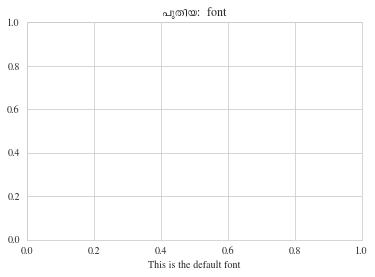

In [42]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib import rcParams

# download and save any malayalam font file in current directory
font_path = 'Rachana.ttf'  
font_manager.fontManager.addfont(font_path)
rcParams['font.family'] = 'Rachana'
fig, ax = plt.subplots()

ax.set_title(f'പുതിയ:  font')
ax.set_xlabel('This is the default font')
plt.show()

Filtering the most common words which are considered as stop words.

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
mystopwords = ['ഒരു', 'ഈ',  'ആണ്', 'വളരെ', 'ഞാൻ', 'തന്നെ', 'ആ', 'വീഡിയോ',  'എന്റെ', 'നമ്മുടെ', 'എല്ലാ', 'അത്', 'എന്ന', 'കൊണ്ട്', 'ഉള്ള', 'ഇത്',  'എല്ലാം', 'എനിക്ക്', 'ഓരോ',  'പിന്നെ',  'ഒക്കെ',  'നിങ്ങൾ', 'വേണ്ടി', 'മാത്രം', 'നിങ്ങളുടെ', 'നിന്നും', 'കൂടെ', 'ഏറ്റവും', 'ഇങ്ങനെ', 'അവരുടെ',  'കാരണം', 'ഇല്ല', 'കൂടുതൽ', '-', 'എല്ലാവർക്കും', 'അവർ', 'പോലും', 'വീണ്ടും', 'എന്നു', 'ചെയ്യാൻ', 'അവിടെ', 'സ്വന്തം', 'അതിന്റെ', 'ഇവിടെ', 'അങ്ങനെ',  'എല്ലാവരും',  'ഞങ്ങൾ',  'നമ്മൾ', 'നമുക്ക്',  'പക്ഷെ', 'നീ',  'പക്ഷേ', 'എന്നെ',  'എന്നാൽ',  'ആരും', 'അതിൽ',  'അല്ല', 'ശേഷം',  'എന്ത്', 'താങ്കൾ', 'എങ്ങനെ', 'അതാണ്',  'നിങ്ങൾക്ക്', ')', 'അവർക്ക്',  'ഏത്',  'മറ്റു', 'അവരെ',
'നല്ല', 'ഉണ്ട്','എന്ന്', 'പോലെ', 'ആയി', 'കണ്ടു', 'ഒന്നും', 'നിന്ന്', 'വരെ', 'ചെയ്തു', 'വന്നു', 'ആയിരുന്നു', 'അടുത്ത', 'ചെയ്യുന്ന', 'പല', 'വേറെ', 'ചില', 'മതി', 'ഒരിക്കലും', 'കുറിച്ച്', 'പറഞ്ഞ', 'വന്ന', 'താങ്കളുടെ', 'ചേട്ടൻ', 'ചേട്ടാ', 'ചെയ്ത', 'നൽകി', 'കണ്ട്', 'എൻറെ', 'വെച്ച്', 'യും', 'നിങ്ങളെ', 'പറഞ്ഞത്', 'മാത്രമേ', 'അവൻ', 'എന്തെങ്കിലും', 'എന്നത്', 'എന്താണ്', 'കഴിഞ്ഞു', 'അറിയാം', 'അതു', 'മാത്രമാണ്', 'അതിനെ', 'ചെയ്ത്', 'ഇവർ', 'സ്വയം', 'മുൻപ്', 'ഉള്ളത്', 'പേര്'
'ഇപ്പോൾ', 'ഇനി', 'ഇനിയും', 'ഇനി' , 'ഇപ്പോൾ' , 'എങ്കിൽ', 'അപ്പോൾ', 'അല്ലെങ്കിൽ', 'ഇതിൽ', 'ഇതൊക്കെ', 'ഇത്രയും', 'ഇതിന്റെ', 'ഞങ്ങളുടെ', 'ഇതാണ്' , 'പിന്നീട്']
# mystopwords = set(mystopwords)

stop_words= ['.', ',', '"', "'", ':', ';', '(', ')', '[', ']', '{', '}','-']

mystopwords = mystopwords + stop_words
mystopwords = set(mystopwords)

text =" ".join(df.text)
f_words = filter(lambda x : x not in mystopwords, text.split())
f_words = filter(lambda x : x not in stop_words, text.split())
# create a word frequency dictionary
# wordfreq = Counter(all_words_xn)

# plt.figure(figsize = (25, 25))
# plt.axis('off')
# wordcloud_fig = WordCloud(font_path='Rachana.ttf', max_words = 2000 , stopwords=mystopwords,
#                           width = 1600 , height = 800, background_color ='white',
#                           min_font_size = 10).generate_from_frequencies(wordfreq)
# #.generate(text)
# plt.imshow(wordcloud_fig, interpolation = 'bilinear')

In [24]:
mystopwords

{'"',
 "'",
 '(',
 ')',
 ',',
 '-',
 '.',
 ':',
 ';',
 '[',
 ']',
 '{',
 '}',
 'അങ്ങനെ',
 'അടുത്ത',
 'അതാണ്',
 'അതിനെ',
 'അതിന്റെ',
 'അതിൽ',
 'അതു',
 'അത്',
 'അപ്പോൾ',
 'അറിയാം',
 'അല്ല',
 'അല്ലെങ്കിൽ',
 'അവരുടെ',
 'അവരെ',
 'അവിടെ',
 'അവൻ',
 'അവർ',
 'അവർക്ക്',
 'ആ',
 'ആണ്',
 'ആയി',
 'ആയിരുന്നു',
 'ആരും',
 'ഇങ്ങനെ',
 'ഇതാണ്',
 'ഇതിന്റെ',
 'ഇതിൽ',
 'ഇതൊക്കെ',
 'ഇത്',
 'ഇത്രയും',
 'ഇനി',
 'ഇനിയും',
 'ഇപ്പോൾ',
 'ഇല്ല',
 'ഇവിടെ',
 'ഇവർ',
 'ഈ',
 'ഉണ്ട്',
 'ഉള്ള',
 'ഉള്ളത്',
 'എങ്കിൽ',
 'എങ്ങനെ',
 'എനിക്ക്',
 'എന്താണ്',
 'എന്തെങ്കിലും',
 'എന്ത്',
 'എന്ന',
 'എന്നത്',
 'എന്നാൽ',
 'എന്നു',
 'എന്നെ',
 'എന്ന്',
 'എന്റെ',
 'എല്ലാ',
 'എല്ലാം',
 'എല്ലാവരും',
 'എല്ലാവർക്കും',
 'എൻറെ',
 'ഏത്',
 'ഏറ്റവും',
 'ഒക്കെ',
 'ഒന്നും',
 'ഒരിക്കലും',
 'ഒരു',
 'ഓരോ',
 'കണ്ടു',
 'കണ്ട്',
 'കഴിഞ്ഞു',
 'കാരണം',
 'കുറിച്ച്',
 'കൂടുതൽ',
 'കൂടെ',
 'കൊണ്ട്',
 'ചില',
 'ചെയ്ത',
 'ചെയ്തു',
 'ചെയ്ത്',
 'ചെയ്യാൻ',
 'ചെയ്യുന്ന',
 'ചേട്ടാ',
 'ചേട്ടൻ',
 'ഞങ്ങളുടെ',
 'ഞങ്ങൾ',
 'ഞാൻ',
 'തന്നെ',
 'താങ്കളുടെ',
 'താങ്കൾ',
 'നമുക്ക്',

### Positive + Negative + Neutral

<BarContainer object of 20 artists>

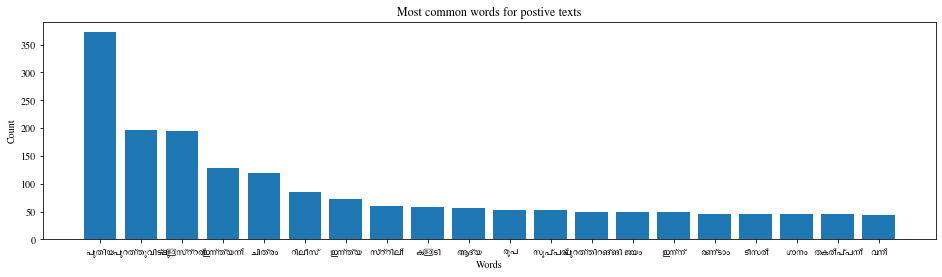

In [25]:
text_pos =" ".join(df[df['sentiment']=="positive"].text)
f_words = filter(lambda x : x not in mystopwords, text_pos.split())
counted_words = Counter(f_words)
words = []
counts = []
for letter, count in counted_words.most_common(20):
    words.append(letter)
    counts.append(count)

# plt.rcParams['font.sans-serif'] = ['Source Han Sans TW', 'sans-serif']   

plt.figure(figsize = (16, 4))
plt.title('Most common words for postive texts')
plt.xlabel('Words')
plt.ylabel('Count')
plt.bar(words, counts)
# matplotlib.rc('font', family='Your Font')

<BarContainer object of 20 artists>

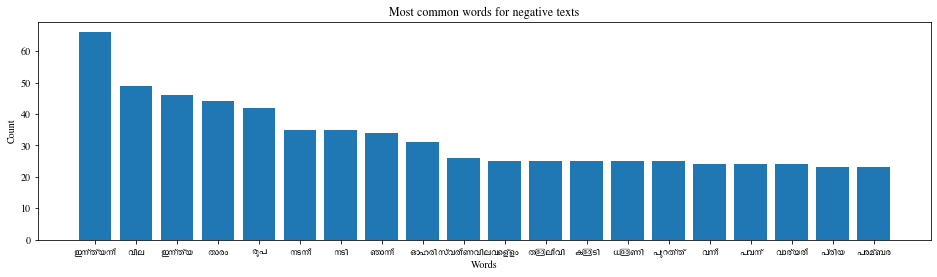

In [26]:
text_neg =" ".join(df[df['sentiment']=="negative"].text)
f_words = filter(lambda x : x not in mystopwords, text_neg.split())
counted_words = Counter(f_words)
words = []
counts = []
for letter, count in counted_words.most_common(20):
    words.append(letter)
    counts.append(count)

# plt.rcParams['font.sans-serif'] = ['Source Han Sans TW', 'sans-serif']   

plt.figure(figsize = (16, 4))
plt.title('Most common words for negative texts')
plt.xlabel('Words')
plt.ylabel('Count')
plt.bar(words, counts)
# matplotlib.rc('font', family='Your Font')

<BarContainer object of 20 artists>

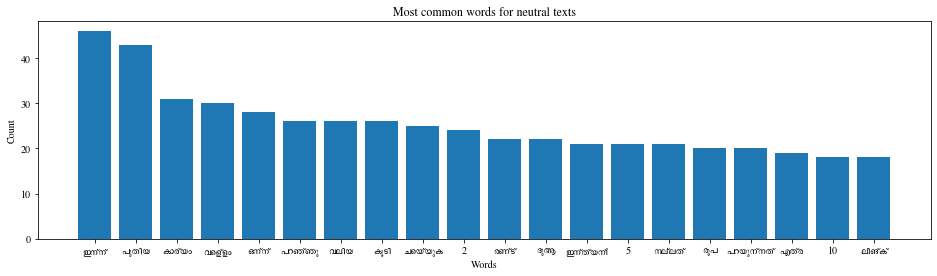

In [27]:
text_neg =" ".join(df[df['sentiment']=="neutral"].text)
f_words = filter(lambda x : x not in mystopwords, text_neg.split())
counted_words = Counter(f_words)
words = []
counts = []
for letter, count in counted_words.most_common(20):
    words.append(letter)
    counts.append(count)

# plt.rcParams['font.sans-serif'] = ['Source Han Sans TW', 'sans-serif']   

plt.figure(figsize = (16, 4))
plt.title('Most common words for neutral texts')
plt.xlabel('Words')
plt.ylabel('Count')
plt.bar(words, counts)
# matplotlib.rc('font', family='Your Font')

# Installing mlmorph for stemming 

In [6]:
#installing mlmorph
! pip install mlmorph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 4.6 MB/s 
     |████████████████████████████████| 365 kB 56.0 MB/s 
  Created wheel for mlmorph: filename=mlmorph-1.3.5-py3-none-any.whl size=5646002 sha256=02861ac65017f1edd884911f20667fc4de5e958ebae78d024ef2d58d7e2fc2e1
  Stored in directory: /root/.cache/pip/wheels/d2/8a/c6/b8acaed490e36c02f00f9adb345eb50a5c6124a15037db7119
Successfully built mlmorph


Example of mlmorph with some malayalam words

In [7]:
from mlmorph import Analyser
analyser = Analyser()
import sfst

analyser.analyse("ആലാപനം")

[('ആലാപനം<n>', 123),
 ('ആൽ<n><adj>ആപനം<n>', 265),
 ('ആൽ<n><coordinative>ആപനം<n>', 265)]

In [8]:
analyser.analyse("കേന്ദ്രത്തിലെ")

[('കേന്ദ്രം<n><locative>എ<indeclinable>', 325)]

In [9]:
analyser.analyse("പൊളിച്ചു")

[('പൊളിയുക<v><causative-voice><past>', 247)]

#Reading text calling from dataset 

In [15]:
#Getting all the news to string from padas dataframe
string_lst = df["text"].values.tolist()

Splitting the string to words of list

In [16]:
# function for splitting the string
def string_to_list(string_lst):
  str_list_stem=[]
  for string in string_lst:
    split_string_list=string.split()
    str_list_stem.append(split_string_list)
  return str_list_stem

In [17]:
str_list_stem=string_to_list(string_lst)

In [18]:

print('Length of list which are splitted into words:',len(str_list_stem))


Length of list which are splitted into words: 5836


#Function for stemming

In [19]:
# function for stemming
def stemmer(string_lst):

  for words in string_lst:
    stem_words=analyser.analyse(words)
    # print(stem_words)

    if  not stem_words:
      stem_list.append(words)
    else:
      pat = re.compile(r'[^\u0d00-\u0d7f\s]',re.UNICODE)
      stem_list.append(re.sub(pat, "", stem_words[0][0]).strip())

  return stem_list

In [ ]:
# for loop for entire dataframe
final_stem_list=[]
for str in str_list_stem:
  # print('String is',str)
  stem_list=[]
  stem=stemmer(str)
  # print('stemmed list is',stem)
  final_stem_list.append(stem)


In [ ]:
print('Length of stemmed list: ',len(final_stem_list))

Length of stemmed list:  5836


In [ ]:
final_stem_list

###importing necessary libraries

In [20]:
#For Pre-Processing
from tqdm import tqdm
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import os, re, csv, math, codecs


# For Training
import keras
from keras import optimizers
from keras import backend as K
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
# from keras.utils import plot_model
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from nltk.tokenize import RegexpTokenizer 

# For array, dataset, and visualizing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
np.random.seed(0)

MAX_NB_WORDS = 100000
tokenizer = RegexpTokenizer(r'\w+')
# stop_words = set(stopwords.words('english'))
stop_words= set(['.', ',', '"', "'", ':', ';', '(', ')', '[', ']', '{', '}'])
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#All this for reproducibility
np.random.seed(1)
rn.seed(1)

#**Fasttext with LSTM**

##Downloading pre-trained fastText, preparing datasets, and pre-processing**

In [44]:
#installing fasttext pretrained vectors
! wget  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ml.300.vec.gz
! gunzip cc.ml.300.vec.gz



--2022-08-21 08:24:49--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ml.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 172.67.9.4, 104.22.74.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1215270076 (1.1G) [binary/octet-stream]
Saving to: ‘cc.ml.300.vec.gz’

cc.ml.300.vec.gz    100%[===================>]   1.13G  36.3MB/s    in 37s     

2022-08-21 08:25:26 (31.6 MB/s) - ‘cc.ml.300.vec.gz’ saved [1215270076/1215270076]




Converting all the words to index in number, to the embedding index in pre-trained model and converted all the missing words to 0,

In [45]:
import numpy as np

import os, re, csv, math, codecs
from tqdm import tqdm
print('loading word embeddings...')
embeddings_index = {}
f = codecs.open('cc.ml.300.vec', encoding='utf-8')

for line in tqdm(f):
    values = line.rstrip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('found %s word vectors' % len(embeddings_index))

loading word embeddings...


2000001it [03:02, 10987.82it/s]

found 2000000 word vectors


In [51]:
print("Length of embedding matrix ",len(embeddings_index))

Length of embedding matrix  2000000


Read both the train data and test data

Function for splitting data in to train and test with all classes

In [52]:
def testtrainsplit(df,frac=0.20):

  from sklearn.model_selection import train_test_split

  trainx = [] 

  testx = []

  for i in ['positive','negative','neutral']:

     tdf = df[df['sentiment'] == i]

     t1, t2 = train_test_split(tdf, test_size=frac, random_state=0)

     num=len(tdf)

     trainx.append(t1)

     testx.append(t2)

  return pd.concat(trainx),pd.concat(testx)

In [53]:
train_df,test_df=testtrainsplit(df,frac=0.20)

In [54]:
print("Number of training data ", train_df.shape[0])
print("Number of testing data: ", test_df.shape[0])

Number of training data  4667
Number of testing data:  1169


In [55]:
train_df

,text,category,sentiment,offensive
233,"ശ്രീശാന്തിന് ആശ്വാസം, വിലക്ക് പിന്‍വലിച്ചു",sports,positive,NaN
2623,പുതിയ കളികളുമായി പത്മനാഭന്റെ മണ്ണിലേക്ക് 'പട്ട...,entertainment,positive,NaN
2589,സിനിമയ്ക്ക് പുറമേ മോദിയുടെ ജീവിതകഥ വെബ് സീരീസാ...,entertainment,positive,NaN
4096,'നീര്‍മാതളം പൂത്തകാലം' ചിത്രത്തിലെ പുതിയ വീഡിയ...,entertainment,positive,NaN
1942,\nമൊഹാലി ഏകദിനം: പ്രതീക്ഷ കൈവിടാതെ ഓസീസ്; ഹാന്...,sports,positive,NaN
...,...,...,...,...
1806,ശരിയാണ് പറഞ്ഞത് കാട്ടാനകളുടെ എണ്ണം കൂടുമ്പോൾ ...,Autos_and_Vehicles,neutral,0
2406,എടാ വിമാനം അവിടേക്ക് സർവീസ് നടത്തിയാലല്ലേ ഇവിട...,People_and_Blogs,neutral,0
4368,അസ്സലാമുഅലൈക്കും വറഹ്മതുള്ളാഹിവബറകാതുഹു ഷ ഹമാര...,Education,neutral,0
4676,കുമ്ബളങ്ങി നെറ്റസിലെ ഫ്രാങ്കി എന്ന കഥാപാത്രത്ത...,entertainment,neutral,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


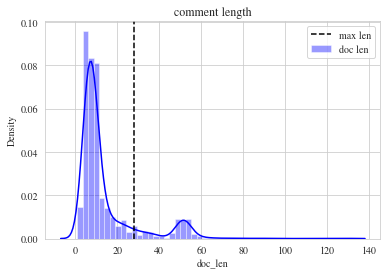

In [56]:
y_train = train_df["sentiment"].tolist()
y_test = test_df["sentiment"].tolist()
train_df['doc_len'] = train_df['text'].apply(lambda words: len(words.split(" ")))
max_seq_len = np.round(train_df['doc_len'].mean() + train_df['doc_len'].std()).astype(int)

sns.distplot(train_df['doc_len'], hist=True, kde=True, color='b', label='doc len')
plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len')
plt.title('comment length'); plt.legend()
plt.show()

In [57]:
print('Maximum length: ',max_seq_len)

Maximum length:  28


tokenizing the data with tokenizer from tensorflow

In [58]:
mystopwords = ['ഒരു', 'ഈ',  'ആണ്', 'വളരെ', 'ഞാൻ', 'തന്നെ', 'ആ', 'വീഡിയോ',  'എന്റെ', 'നമ്മുടെ', 'എല്ലാ', 'അത്', 'എന്ന', 'കൊണ്ട്', 'ഉള്ള', 'ഇത്',  'എല്ലാം', 'എനിക്ക്', 'ഓരോ',  'പിന്നെ',  'ഒക്കെ',  'നിങ്ങൾ', 'വേണ്ടി', 'മാത്രം', 'നിങ്ങളുടെ', 'നിന്നും', 'കൂടെ', 'ഏറ്റവും', 'ഇങ്ങനെ', 'അവരുടെ',  'കാരണം', 'ഇല്ല', 'കൂടുതൽ', '-', 'എല്ലാവർക്കും', 'അവർ', 'പോലും', 'വീണ്ടും', 'എന്നു', 'ചെയ്യാൻ', 'അവിടെ', 'സ്വന്തം', 'അതിന്റെ', 'ഇവിടെ', 'അങ്ങനെ',  'എല്ലാവരും',  'ഞങ്ങൾ',  'നമ്മൾ', 'നമുക്ക്',  'പക്ഷെ', 'നീ',  'പക്ഷേ', 'എന്നെ',  'എന്നാൽ',  'ആരും', 'അതിൽ',  'അല്ല', 'ശേഷം',  'എന്ത്', 'താങ്കൾ', 'എങ്ങനെ', 'അതാണ്',  'നിങ്ങൾക്ക്', ')', 'അവർക്ക്',  'ഏത്',  'മറ്റു', 'അവരെ',
'നല്ല', 'ഉണ്ട്','എന്ന്', 'പോലെ', 'ആയി', 'കണ്ടു', 'ഒന്നും', 'നിന്ന്', 'വരെ', 'ചെയ്തു', 'വന്നു', 'ആയിരുന്നു', 'അടുത്ത', 'ചെയ്യുന്ന', 'പല', 'വേറെ', 'ചില', 'മതി', 'ഒരിക്കലും', 'കുറിച്ച്', 'പറഞ്ഞ', 'വന്ന', 'താങ്കളുടെ', 'ചേട്ടൻ', 'ചേട്ടാ', 'ചെയ്ത', 'നൽകി', 'കണ്ട്', 'എൻറെ', 'വെച്ച്', 'യും', 'നിങ്ങളെ', 'പറഞ്ഞത്', 'മാത്രമേ', 'അവൻ', 'എന്തെങ്കിലും', 'എന്നത്', 'എന്താണ്', 'കഴിഞ്ഞു', 'അറിയാം', 'അതു', 'മാത്രമാണ്', 'അതിനെ', 'ചെയ്ത്', 'ഇവർ', 'സ്വയം', 'മുൻപ്', 'ഉള്ളത്', 'പേര്'
'ഇപ്പോൾ', 'ഇനി', 'ഇനിയും', 'ഇനി' , 'ഇപ്പോൾ' , 'എങ്കിൽ', 'അപ്പോൾ', 'അല്ലെങ്കിൽ', 'ഇതിൽ', 'ഇതൊക്കെ', 'ഇത്രയും', 'ഇതിന്റെ', 'ഞങ്ങളുടെ', 'ഇതാണ്' , 'പിന്നീട്']
# mystopwords = set(mystopwords)

In [59]:
stop_words=mystopwords

In [ ]:
mystopwords

In [61]:
from sklearn.utils import shuffle 

raw_docs_train = train_df['text'].tolist()
raw_docs_test = test_df['text'].tolist() 
# num_classes = len(label_names)

print("pre-processing train data...")

#Training data
processed_docs_train = []
for doc in tqdm(raw_docs_train):
    tokens = word_tokenize(doc)
    filtered = [word for word in tokens if word not in stop_words]
    processed_docs_train.append(" ".join(filtered))
#end for



pre-processing train data...


100%|██████████| 4667/4667 [00:00<00:00, 5644.32it/s]


In [62]:
print('Length of processed train list :',len(processed_docs_train))

Length of processed train list : 4667


In [63]:
#Testing data
processed_docs_test = []
for doc in tqdm(raw_docs_test):
    tokens = word_tokenize(doc)
    filtered = [word for word in tokens if word not in stop_words]
    processed_docs_test.append(" ".join(filtered))
#end for



100%|██████████| 1169/1169 [00:00<00:00, 5583.10it/s]


In [64]:
print('Length of processed test list :',len(processed_docs_test))

Length of processed test list : 1169


In [65]:
print("tokenizing input data...")
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=True, char_level=False)
tokenizer.fit_on_texts(processed_docs_train + processed_docs_test)  #leaky
word_seq_train = tokenizer.texts_to_sequences(processed_docs_train)
word_seq_test = tokenizer.texts_to_sequences(processed_docs_test)
word_index = tokenizer.word_index
print("dictionary size: ", len(word_index))

#pad sequences
word_seq_train = sequence.pad_sequences(word_seq_train, maxlen=max_seq_len)
word_seq_test = sequence.pad_sequences(word_seq_test, maxlen=max_seq_len)

tokenizing input data...
dictionary size:  22763


In [66]:

labels=df['sentiment'].tolist()
print(set(labels))

{'neutral', 'positive', 'negative'}


In [67]:
y_train[-1]

'neutral'

In [36]:
encoder=LabelEncoder()

In [37]:
encoder.fit(list(y_train)+list(y_test))
y_triano=encoder.transform(y_train)
y_testo=encoder.transform(y_test)

In [68]:
y_triano[-1]

1

One hot encoding

In [78]:
from keras.utils import np_utils

In [79]:
y_train_oh = np_utils.to_categorical(encoder.transform(y_train))
y_test_oh  = np_utils.to_categorical(encoder.transform(y_test))

In [80]:
y_train_oh.shape

(4667, 3)

defining variables that used on training

In [69]:
#training params
batch_size = 256 
num_epochs = 40

#model parameters
num_filters = 64 
embed_dim = 300 
weight_decay = 1e-4

Building the embedding matrix for the weights in Embedding Layer on training. more about embedding matrix: https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

all words that aren't in the pre-trained model from fasttext would be changed to 0. the words are basically the ones with typos or names, the words mostly dont matter so much to the pattern. so it's nicer to just weights it 0.

In [70]:
#embedding matrix

print('preparing embedding matrix...')

words_not_found = []
nb_words = min(MAX_NB_WORDS, len(word_index)+1)
embedding_matrix = np.zeros((nb_words, embed_dim))

for word, i in word_index.items():
    if i >= nb_words:
        continue
    
    embedding_vector = embeddings_index.get(word)
    if (embedding_vector is not None) and len(embedding_vector) > 0:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)
print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

preparing embedding matrix...
number of null word embeddings: 5853


In [71]:
print("sample words not found: ", np.random.choice(words_not_found, 10))

sample words not found:  ['ഐമയും' 'നൈറ്റ്\u200cസിലെ' 'കുനിഷ്ട്' 'സി\u200bല്\u200dക്സ്'
 'ഇ\u200bഎം\u200bഐ' 'സമ്ബത്ത്' 'പൂര്\u200dണ്ണമാവില്ലെന്ന്' 'മുടിയനോട്'
 'റാഗ്\u200cനോസ്' 'തീർന്നോടം']


In [72]:
embedding_matrix.shape

(22764, 300)

let's start training! here are the layers. i have been doing some test and modification on using the layer, unit cells, etc.

In [81]:
from keras.layers import BatchNormalization
import tensorflow as tf

model = Sequential()

model.add(Embedding(nb_words,embed_dim,input_length=max_seq_len, weights=[embedding_matrix],trainable=False))

# model.add(LSTM(128))
# # model.add(Dense(32,activation='relu'))
# # model.add(Dropout(0.5))
# # model.add(Bidirectional(LSTM(embed_dim)))
# model.add(Dense(1,activation='softmax'))
# model.summary()

model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(embed_dim)))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 28, 300)           6828900   
                                                                 
 dropout_1 (Dropout)         (None, 28, 300)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 600)              1442400   
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 3)                 1803      
                                                                 
Total params: 8,273,103
Trainable params: 1,444,203
Non-trainable params: 6,828,900
_________________________________________________________________


In [82]:
# from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])#,tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
              #,tf.keras.metrics.AUC(),tf.keras.metrics.TrueNegatives(),tf.keras.metrics.TruePositives(),tf.keras.metrics.FalseNegatives(),tf.keras.metrics.FalsePositives()])




/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [85]:
y_train_oh.shape

(4667, 3)

In [86]:
num_epochs = 40
# history = model.fit(word_seq_train, training_label_seq, epochs=num_epochs, validation_data=(word_seq_test,testing_label_seq),callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

history_lst_ft = model.fit(word_seq_train, y_train_oh, epochs=num_epochs, validation_data=(word_seq_test,y_test_oh),callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/40
146/146 [==============================] - 25s 170ms/step - loss: 0.7092 - accuracy: 0.6979 - val_loss: 0.7091 - val_accuracy: 0.6895
Epoch 2/40
146/146 [==============================] - 25s 169ms/step - loss: 0.6687 - accuracy: 0.7238 - val_loss: 0.6745 - val_accuracy: 0.7083
Epoch 3/40
146/146 [==============================] - 25s 170ms/step - loss: 0.6464 - accuracy: 0.7302 - val_loss: 0.6765 - val_accuracy: 0.7263
Epoch 4/40
146/146 [==============================] - 25s 173ms/step - loss: 0.6217 - accuracy: 0.7414 - val_loss: 0.6352 - val_accuracy: 0.7391
Epoch 5/40
146/146 [==============================] - 25s 172ms/step - loss: 0.5981 - accuracy: 0.7529 - val_loss: 0.6377 - val_accuracy: 0.7391
Epoch 6/40
146/146 [==============================] - 25s 171ms/step - loss: 0.5866 - accuracy: 0.7564 - val_loss: 0.6266 - val_accuracy: 0.7305
Epoch 7/40
146/146 [==============================] - 25s 170ms/step - loss: 0.5803 - accuracy: 0.7551 - val_loss: 0.6603 - val_ac

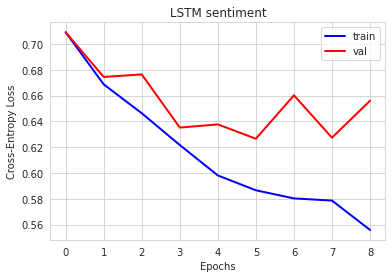

In [87]:
#generate plots
plt.figure()
plt.plot(history_lst_ft.history['loss'], lw=2.0, color='b', label='train')
plt.plot(history_lst_ft.history['val_loss'], lw=2.0, color='r', label='val')
plt.title('LSTM sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()



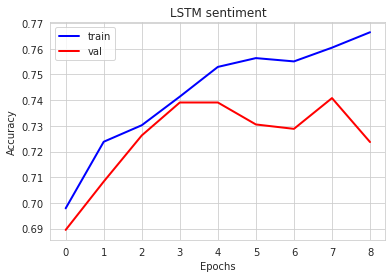

In [88]:
plt.figure()
plt.plot(history_lst_ft.history['accuracy'], lw=2.0, color='b', label='train')
plt.plot(history_lst_ft.history['val_accuracy'], lw=2.0, color='r', label='val')
plt.title('LSTM sentiment')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

Printing the accuracy of the model

###Fuunction for f1score/precision/accuracy/recall

In [89]:
mean_fpr = np.linspace(start=0, stop=1, num=100)
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_recall_fscore_support
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix
from scipy import interp

def evaluate_model(X_test, y_test, model):
    # predict probabilities for test set
    _probs = model.predict(X_test, verbose=0)
    # predict crisp classes for test set
    _classes=np.argmax(_probs,axis=1)
    # _classes = model.predict_classes(X_test, verbose=0)
    # reduce to 1d array
    # _probs = _probs[:, 0]
    # _classes = _classes[:, 0]

    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, _classes)
    # precision tp / (tp + fp)
    precision = precision_score(y_test, _classes, average='macro')
    # recall: tp / (tp + fn)
    recall = recall_score(y_test, _classes, average='macro')
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test, _classes, average='macro')
    
    # fpr, tpr, _ = roc_curve(y_test, _probs)
    
    # tpr_transformed = np.array([interp(mean_fpr, fpr, tpr)])
    
    # compute the area under the curve
    # _auc = auc(fpr, tpr)
    
    return accuracy, precision, recall , f1,_classes#,tpr_transformed #,_auc

In [94]:
LSTM_FT_accuracy, LSTM_FT_precision, LSTM_FT_recall,LSTM_FT_f1_score,LSTM_FT_y_pred  = evaluate_model(word_seq_test, y_testo, model)


In [95]:
!pip install beautifultable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [96]:

h0=["Algorithm"]
h1=["LSTM",LSTM_FT_accuracy,LSTM_FT_f1_score,LSTM_FT_precision,LSTM_FT_recall]

h0.append("LSTM_FT_Accuracy")
h0.append("LSTM_FT_F1 Measure")
h0.append("LSTM_FT_Precision")
h0.append("LSTM_FT_Recall")

from beautifultable import BeautifulTable
table = BeautifulTable()
table.column_headers = h0
table.append_row(h1)
print(table)

+-----------+---------------+-------------------+----------------+-------------+
| Algorithm | LSTM_FT_Accur | LSTM_FT_F1 Measur | LSTM_FT_Precis | LSTM_FT_Rec |
|           |      acy      |         e         |      ion       |     all     |
+-----------+---------------+-------------------+----------------+-------------+
|   LSTM    |     0.724     |       0.681       |     0.775      |    0.651    |
+-----------+---------------+-------------------+----------------+-------------+


/usr/local/lib/python3.7/dist-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.column_headers' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTColumnCollection.header' instead.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.append_row' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTRowCollection.append' instead.
  warnings.warn(message, FutureWarning)


In [97]:
class_name = ['Negative','Neutral','Positive']

In [100]:

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_testo, LSTM_FT_y_pred, target_names=class_name, zero_division=0, digits=4))

              precision    recall  f1-score   support

    Negative     0.7849    0.4576    0.5782       295
     Neutral     0.8587    0.5623    0.6796       281
    Positive     0.6802    0.9325    0.7866       593

    accuracy                         0.7237      1169
   macro avg     0.7746    0.6508    0.6815      1169
weighted avg     0.7495    0.7237    0.7083      1169



###function for confusion matrix

In [110]:
import seaborn as sns
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');

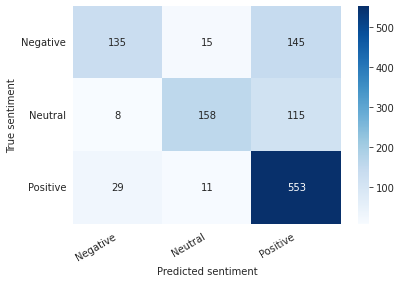

In [101]:

cm = confusion_matrix(y_testo, LSTM_FT_y_pred)
df_cm = pd.DataFrame(cm, index=class_name, columns=class_name)
show_confusion_matrix(df_cm)

# LSTM with fasttext stemming

processing train and test data for stemming

In [73]:
from sklearn.utils import shuffle 

raw_docs_train = train_df['text'].tolist()
raw_docs_test = test_df['text'].tolist() 
# num_classes = len(label_names)



In [115]:
#splitting train list for stemming
str_list_stem_train=string_to_list(raw_docs_train)

In [116]:
#splitting test list for stemming
str_list_stem_test=string_to_list(raw_docs_test)

In [117]:
#stemming for train list
print('Length of list which are splitted into words in train list:',len(str_list_stem_train))
raw_docs_train_stem=[]
for str in str_list_stem_train:
  # print('String is',str)
  stem_list=[]
  stem=stemmer(str)
  # print('stemmed list is',stem)
  raw_docs_train_stem.append(" ".join(stem))

Length of list which are splitted into words in train list: 4667


In [118]:
#stemming for test list
print('Length of list which are splitted into words in test list:',len(str_list_stem_test))
raw_docs_test_stem=[]
for str in str_list_stem_test:
  # print('String is',str)
  stem_list=[]
  stem=stemmer(str)
  # print('stemmed list is',stem)
  raw_docs_test_stem.append(" ".join(stem))

Length of list which are splitted into words in test list: 1169


In [119]:
print("pre-processing train data...")

#Training data
processed_docs_train_stem = []
for doc in tqdm(raw_docs_train_stem):
    tokens = word_tokenize(doc)
    filtered = [word for word in tokens if word not in stop_words]
    processed_docs_train_stem.append(" ".join(filtered))
#end for


pre-processing train data...


100%|██████████| 4667/4667 [00:00<00:00, 6233.07it/s]


In [120]:
print("pre-processing test data...")

#test data
processed_docs_test_stem = []
for doc in tqdm(raw_docs_test_stem):
    tokens = word_tokenize(doc)
    filtered = [word for word in tokens if word not in stop_words]
    processed_docs_test_stem.append(" ".join(filtered))
#end for


pre-processing test data...


100%|██████████| 1169/1169 [00:00<00:00, 6399.50it/s]


In [121]:
print('Length of processed train list :',len(processed_docs_train_stem))
print('Length of processed train list :',len(processed_docs_test_stem))

Length of processed train list : 4667
Length of processed train list : 1169


Tokenizing stemmed data

In [110]:
print("tokenizing input data...")
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=True, char_level=False)
tokenizer.fit_on_texts(processed_docs_train_stem + processed_docs_test_stem)  #leaky
word_seq_train_stem = tokenizer.texts_to_sequences(processed_docs_train_stem)
word_seq_test_stem = tokenizer.texts_to_sequences(processed_docs_test_stem)
word_index_stem = tokenizer.word_index
print("dictionary size: ", len(word_index_stem))

#pad sequences
word_seq_train_stem = sequence.pad_sequences(word_seq_train_stem, maxlen=max_seq_len)
word_seq_test_stem = sequence.pad_sequences(word_seq_test_stem, maxlen=max_seq_len)

tokenizing input data...
dictionary size:  17859


Embedding matrix for stemmed data

In [111]:
#embedding matrix

print('preparing embedding matrix...')

words_not_found = []
nb_words = min(MAX_NB_WORDS, len(word_index_stem)+1)
embedding_matrix_ft_stem = np.zeros((nb_words, embed_dim))

for word, i in word_index_stem.items():
    if i >= nb_words:
        continue
    
    embedding_vector = embeddings_index.get(word)
    if (embedding_vector is not None) and len(embedding_vector) > 0:
        # words not found in embedding index will be all-zeros.
        embedding_matrix_ft_stem[i] = embedding_vector
    else:
        words_not_found.append(word)
print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix_ft_stem, axis=1) == 0))

preparing embedding matrix...
number of null word embeddings: 8756


In [112]:
embedding_matrix_ft_stem.shape

(17860, 300)

let's start training! here are the layers. -Stemming

In [113]:
from keras.layers import BatchNormalization
import tensorflow as tf

model = Sequential()

model.add(Embedding(nb_words,embed_dim,input_length=max_seq_len, weights=[embedding_matrix_ft_stem],trainable=False))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(embed_dim)))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 28, 300)           5358000   
                                                                 
 dropout_2 (Dropout)         (None, 28, 300)           0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 600)              1442400   
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 3)                 1803      
                                                                 
Total params: 6,802,203
Trainable params: 1,444,203
Non-trainable params: 5,358,000
_________________________________________________________________


In [114]:
# from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])#,tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
              #,tf.keras.metrics.AUC(),tf.keras.metrics.TrueNegatives(),tf.keras.metrics.TruePositives(),tf.keras.metrics.FalseNegatives(),tf.keras.metrics.FalsePositives()])




/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [115]:
num_epochs = 40
# history = model.fit(word_seq_train, training_label_seq, epochs=num_epochs, validation_data=(word_seq_test,testing_label_seq),callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


history_lst_ft_stm = model.fit(word_seq_train_stem, y_train_oh, epochs=num_epochs, validation_data=(word_seq_test_stem,y_test_oh),callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/40
146/146 [==============================] - 61s 240ms/step - loss: 0.8565 - accuracy: 0.6137 - val_loss: 0.7849 - val_accuracy: 0.6459
Epoch 2/40
146/146 [==============================] - 25s 170ms/step - loss: 0.7559 - accuracy: 0.6715 - val_loss: 0.7702 - val_accuracy: 0.6724
Epoch 3/40
146/146 [==============================] - 26s 175ms/step - loss: 0.7222 - accuracy: 0.6885 - val_loss: 0.7426 - val_accuracy: 0.6895
Epoch 4/40
146/146 [==============================] - 25s 171ms/step - loss: 0.6944 - accuracy: 0.7039 - val_loss: 0.7329 - val_accuracy: 0.6955
Epoch 5/40
146/146 [==============================] - 25s 172ms/step - loss: 0.6773 - accuracy: 0.7167 - val_loss: 0.7167 - val_accuracy: 0.6997
Epoch 6/40
146/146 [==============================] - 25s 168ms/step - loss: 0.6523 - accuracy: 0.7212 - val_loss: 0.7465 - val_accuracy: 0.6818
Epoch 7/40
146/146 [==============================] - 24s 167ms/step - loss: 0.6408 - accuracy: 0.7300 - val_loss: 0.7110 - val_ac

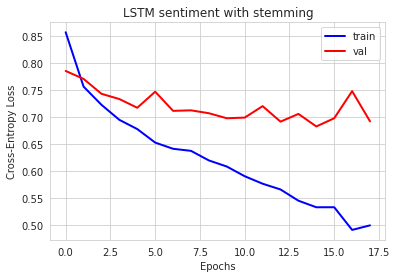

In [116]:
#generate plots
plt.figure()
plt.plot(history_lst_ft_stm.history['loss'], lw=2.0, color='b', label='train')
plt.plot(history_lst_ft_stm.history['val_loss'], lw=2.0, color='r', label='val')
plt.title('LSTM sentiment with stemming')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()


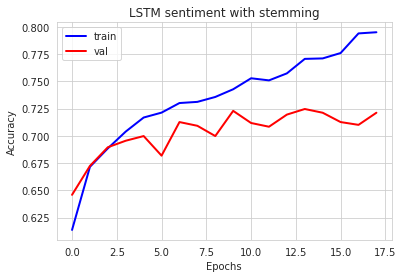

In [117]:
plt.figure()
plt.plot(history_lst_ft_stm.history['accuracy'], lw=2.0, color='b', label='train')
plt.plot(history_lst_ft_stm.history['val_accuracy'], lw=2.0, color='r', label='val')
plt.title('LSTM sentiment with stemming')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

LSTM_accuracy, LSTM_precision, LSTM_recall,LSTM_f1_score for stemmed data

In [119]:
LSTM_FT_STM_accuracy, LSTM_FT_STM_precision, LSTM_FT_STM_recall,LSTM_FT_STM_f1_score,LSTM_FT_STM_y_pred  = evaluate_model(word_seq_test_stem, y_testo, model)
h0=["Algorithm"]
h1=["LSTM",LSTM_FT_STM_accuracy,LSTM_FT_STM_f1_score,LSTM_FT_STM_precision,LSTM_FT_STM_recall]

h0.append("Accuracy")
h0.append("F1 Measure")
h0.append("Precision")
h0.append("Recall")

from beautifultable import BeautifulTable
table = BeautifulTable()
table.column_headers = h0
table.append_row(h1)
print(table)

+-----------+----------+------------+-----------+--------+
| Algorithm | Accuracy | F1 Measure | Precision | Recall |
+-----------+----------+------------+-----------+--------+
|   LSTM    |  0.721   |   0.692    |   0.712   |  0.68  |
+-----------+----------+------------+-----------+--------+


/usr/local/lib/python3.7/dist-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.column_headers' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTColumnCollection.header' instead.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.append_row' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTRowCollection.append' instead.
  warnings.warn(message, FutureWarning)


In [120]:

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_testo, LSTM_FT_STM_y_pred, target_names=class_name, zero_division=0, digits=4))

              precision    recall  f1-score   support

    Negative     0.6460    0.6000    0.6221       295
     Neutral     0.7478    0.6014    0.6667       281
    Positive     0.7429    0.8381    0.7876       593

    accuracy                         0.7211      1169
   macro avg     0.7122    0.6798    0.6921      1169
weighted avg     0.7196    0.7211    0.7168      1169



Confusionmatrix for stemming data

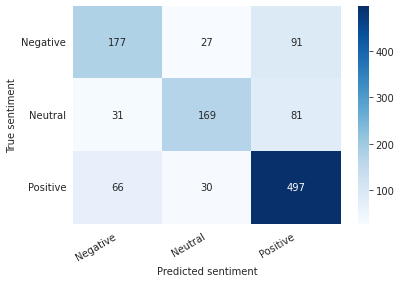

In [121]:
cm = confusion_matrix(y_testo, LSTM_FT_STM_y_pred)
df_cm = pd.DataFrame(cm, index=class_name, columns=class_name)
show_confusion_matrix(df_cm)

#SVM with fasttext

Importing required libraries

In [74]:
import string
import sys
import time
import json
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import random as rn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [75]:
#All this for reproducibility
np.random.seed(1)
rn.seed(1)

In [76]:
wvLength = 300
vectorSource='fasttext'

function for Xencoding, #Xencoded is a sparse nDocs x nWords matrix. When using word-embeddings we convert that to a dense nDocs x 300 matrix by multiplying with the embedding matrix 

In [77]:
def sparseMultiply (sparseX, corpus_embedding_matrix):
    denseZ = []
    for row in sparseX:
        newRow = np.zeros(wvLength)
        for nonzeroLocation, value in list(zip(row.indices, row.data)):
            newRow = newRow + value * corpus_embedding_matrix[nonzeroLocation]
        denseZ.append(newRow)
    denseZ = np.array([np.array(xi) for xi in denseZ])
    return denseZ

function for getting embedding matrix.

In [78]:

def getEmbeddingMatrix (word_index, vectorSource):
    wordVecSources = {'fasttext' : '/content/cc.ml.300.vec' }
    f = open (wordVecSources[vectorSource])
    allWv = {}
    if (vectorSource == 'fasttext'):
        errorCount = 0
        for line in f:
            values = line.split()
            word = values[0].strip()
            try:
                wv = np.asarray(values[1:], dtype='float32')
                if (len(wv) != wvLength):
                    errorCount = errorCount + 1
                    continue
            except:
                errorCount = errorCount + 1
                continue
            allWv[word] = wv
        print ("# Bad Word Vectors:", errorCount)
    f.close()
    embedding_matrix = np.zeros((len(word_index)+1, wvLength))  # +1 for the masked 0
    for word, i in word_index.items():
        if word in allWv:
            embedding_matrix[i] = allWv[word]
    return embedding_matrix

Getting the number of classes

In [79]:
numClasses = len(set(labels))

In [80]:
print("Number of classes to be predicted ",numClasses)

Number of classes to be predicted  3


Appending processed train and test document 

In [81]:
processed_docs = [*processed_docs_train, *processed_docs_test]


In [82]:
y_triano.shape

(4667,)

In [83]:
training_label_seq_r=y_triano.reshape(1,y_triano.shape[0])

In [84]:
testing_label_seq_r=y_testo.reshape(1,y_testo.shape[0])

In [85]:
training_label_seq_r.shape

(1, 4667)

Appending train and test labels

In [86]:
labels = np.append(training_label_seq_r, testing_label_seq_r)

In [87]:
labels.shape

(5836,)

Splittig the text to words before building vocabulary

In [88]:
X=[]
for string in processed_docs:

  split_string_list=string.split()
  X.append(split_string_list)

In [89]:
print("Length of total docs passed ",len(X))

Length of total docs passed  5836


Using scikit-learn Tf-Idf Vectorizer to build the vocabulary 

In [90]:
X=np.array([np.array(xi) for xi in X])          #   rows: Docs. columns: words
vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=1).fit(X)
word_index_tf = vectorizer.vocabulary_


Xencoded = vectorizer.transform(X)
print ('Vocab sparse-Xencoded {} {} '.format(len(word_index_tf), (Xencoded.shape)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


Vocab sparse-Xencoded 23007 (5836, 23007) 


In [91]:
X.shape

(5836,)

In [92]:
len(word_index_tf)

23007

In [93]:
Xencoded.shape

(5836, 23007)

getting embedding matrix for fastext word index

In [94]:
embedding_matrix_f = getEmbeddingMatrix(word_index_tf, vectorSource)


# Bad Word Vectors: 1


In [95]:
#Xencoded is a sparse nDocs x nWords matrix. When using word-embeddings we convert that to a dense nDocs x 300 matrix by multiplying with the embedding matrix 
Xencoded_f = sparseMultiply (Xencoded, embedding_matrix_f)


In [96]:
print ('Dense-Xencoded {}'.format((Xencoded_f.shape)))

Dense-Xencoded (5836, 300)


In [138]:
embedding_matrix_f.shape

(23008, 300)

###splitting data into train and test and fitting to model

In [97]:
# Test & Train Split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1).split(Xencoded_f, labels)
train_indices, test_indices = next(sss)
train_x, test_x = Xencoded_f[train_indices], Xencoded_f[test_indices]
train_labels, test_labels = labels[train_indices], labels[test_indices]
start_time = time.time()

In [98]:
train_x.shape

(4668, 300)

In [99]:
train_x

array([[ 0.00265469, -0.00724   ,  0.04653403, ..., -0.04543449,
         0.06427837, -0.06641102],
       [-0.04453702, -0.04116803,  0.05305351, ..., -0.03430597,
        -0.00085099, -0.05673002],
       [ 0.00520968,  0.0973384 ,  0.11137645, ...,  0.03640306,
         0.01052594, -0.04492969],
       ...,
       [-0.02410523,  0.03630971, -0.01158395, ..., -0.01144196,
         0.02730486,  0.05162507],
       [ 0.07584102, -0.02734386,  0.03674372, ..., -0.03055861,
         0.061947  ,  0.07723835],
       [-0.01046912,  0.01587473,  0.02278351, ..., -0.00862719,
        -0.01419241, -0.0113465 ]])

In [100]:
train_labels.shape

(4668,)

In [101]:
train_labels

array([2, 2, 2, ..., 2, 2, 2])

In [102]:
np.unique(train_labels)

array([0, 1, 2])

In [103]:
pipe = Pipeline(steps=[('fclasif',SelectKBest(f_classif,k=100)),('svm', SVC(probability=True))])
param_grid = {
    'svm__C': [0.1, 1, 10, 100],  
    'svm__gamma': [1, 0.1, 0.01, 0.001], 
    'svm__kernel': ['rbf', 'linear', 'poly']
}
search = GridSearchCV(pipe, param_grid, cv=5,  refit=True)
search.fit(train_x, train_labels)
print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
SVM_best_params = search.best_params_
SVM_best_model_wo_stem_ft = search.best_estimator_


Best CV score = 0.752:
Best parameters:  {'svm__C': 10, 'svm__gamma': 1, 'svm__kernel': 'rbf'}


In [104]:
test_pred = SVM_best_model_wo_stem_ft.predict(test_x)

In [105]:

labelToName={2: 'Positive', 0:'Negative',1:'Neutral'}
labelToNameSortedByLabel = sorted(labelToName.items(), key=lambda kv: kv[0]) # List of tuples sorted by the label number [ (0, ''), (1, ''), .. ]
print(labelToNameSortedByLabel)

[(0, 'Negative'), (1, 'Neutral'), (2, 'Positive')]


In [106]:
namesInLabelOrder = [item[1] for item in labelToNameSortedByLabel]
print(namesInLabelOrder)

['Negative', 'Neutral', 'Positive']


In [107]:
print (confusion_matrix(test_labels, test_pred))
print (classification_report(test_labels, test_pred, digits=4, target_names=namesInLabelOrder))


[[187  11  97]
 [ 16 160 104]
 [ 54  23 516]]
              precision    recall  f1-score   support

    Negative     0.7276    0.6339    0.6775       295
     Neutral     0.8247    0.5714    0.6751       280
    Positive     0.7197    0.8702    0.7878       593

    accuracy                         0.7389      1168
   macro avg     0.7573    0.6918    0.7135      1168
weighted avg     0.7469    0.7389    0.7329      1168



Accuracy score for the model

In [108]:
accuracyscore=accuracy_score(test_labels, test_pred)
print("Accuracy score for fast-text SVM model ",accuracyscore)

Accuracy score for fast-text SVM model  0.7388698630136986


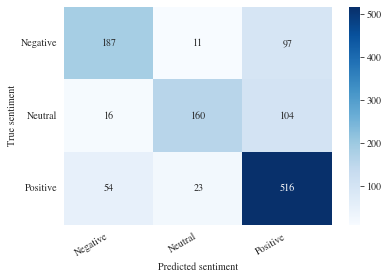

In [111]:

cm = confusion_matrix(test_labels, test_pred)
df_cm = pd.DataFrame(cm, index=namesInLabelOrder, columns=namesInLabelOrder)
show_confusion_matrix(df_cm)

In [112]:
mean_fpr = np.linspace(start=0, stop=1, num=100)

def evaluate_model1(X_test, y_test, model):
    # compute probabilistic predictiond for the evaluation set
    _probabilities = model.predict_proba(X_test)[:, 1]
    
    # compute exact predictiond for the evaluation set
    _predicted_values = model.predict(X_test)
        
    # compute accuracy
    _accuracy = accuracy_score(y_test, _predicted_values)
        
    # compute precision, recall and f1 score for class 1
    _precision, _recall, _f1_score, _ = precision_recall_fscore_support(y_test, _predicted_values, labels=[1])
    
    # # compute fpr and tpr values for various thresholds 
    # # by comparing the true target values to the predicted probabilities for class 1
    # _fpr, _tpr, _ = roc_auc_score(y_test, _probabilities,multi_class="ovr")
        
    # # compute true positive rates for the values in the array mean_fpr
    # _tpr_transformed = np.array([interp(mean_fpr, _fpr, _tpr)])
    
    # # compute the area under the curve
    # _auc = auc(_fpr, _tpr)
            
    return _accuracy, _precision[0], _recall[0], _f1_score[0]
    #, _tpr_transformed, _auc

In [181]:
SVM_FT_accuracy, SVM_FT_precision, SVM_FT_recall ,SVM_FT_f1_score = evaluate_model1(test_x, test_labels, SVM_best_model_wo_stem_ft)
h0=["Algorithm"]
h1=["SVM",SVM_FT_accuracy,SVM_FT_f1_score,SVM_FT_precision,SVM_FT_recall]

h0.append("Accuracy")
h0.append("F1 Measure")
h0.append("Precision")
h0.append("Recall")

from beautifultable import BeautifulTable
table = BeautifulTable()
table.column_headers = h0
table.append_row(h1)
print(table)

+-----------+----------+------------+-----------+--------+
| Algorithm | Accuracy | F1 Measure | Precision | Recall |
+-----------+----------+------------+-----------+--------+
|    SVM    |  0.738   |   0.658    |   0.777   | 0.571  |
+-----------+----------+------------+-----------+--------+


/usr/local/lib/python3.7/dist-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.column_headers' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTColumnCollection.header' instead.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.append_row' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTRowCollection.append' instead.
  warnings.warn(message, FutureWarning)


#SVM fasttext with stemmming

Appending processed train and test stemmed document 

In [122]:
processed_docs_stem = [*processed_docs_train_stem, *processed_docs_test_stem]

In [123]:
X_stem=[]
for string in processed_docs_stem:

  split_string_list=string.split()
  X_stem.append(split_string_list)

In [124]:
print("Length of total docs passed ",len(X_stem))

Length of total docs passed  5836


In [125]:
X_stem=np.array([np.array(xi) for xi in X_stem])          #   rows: Docs. columns: words
vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=1).fit(X_stem)
word_index_tf_stem = vectorizer.vocabulary_


Xencoded_stem = vectorizer.transform(X_stem)
print ('Vocab sparse-Xencoded {} {} '.format(len(word_index_tf_stem), (Xencoded_stem.shape)))

Vocab sparse-Xencoded 17828 (5836, 17828) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [126]:
len(word_index_tf_stem)

17828

In [127]:
X_stem.shape

(5836,)

In [128]:
Xencoded_stem.shape

(5836, 17828)

getting embedding matrix for fastext word index -stemming

In [129]:
embedding_matrix_f_stem = getEmbeddingMatrix(word_index_tf_stem, vectorSource)

# Bad Word Vectors: 1


In [130]:
embedding_matrix_f_stem.shape

(17829, 300)

In [131]:
#Xencoded is a sparse nDocs x nWords matrix. When using word-embeddings we convert that to a dense nDocs x 300 matrix by multiplying with the embedding matrix 
Xencoded_f_stem = sparseMultiply (Xencoded_stem, embedding_matrix_f_stem)


In [132]:
print ('Dense-Xencoded {} -stemming'.format((Xencoded_f_stem.shape)))

Dense-Xencoded (5836, 300) -stemming


###splitting data into train and test and fitting to model-stemming

In [133]:
# Test & Train Split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1).split(Xencoded_f_stem, labels)
train_indices, test_indices = next(sss)
train_x, test_x = Xencoded_f_stem[train_indices], Xencoded_f_stem[test_indices]
train_labels, test_labels = labels[train_indices], labels[test_indices]
start_time = time.time()

In [134]:
pipe = Pipeline(steps=[('fclasif',SelectKBest(f_classif,k=100)),('svm', SVC(probability=True))])
param_grid = {
    'svm__C': [0.1, 1, 10, 100],  
    'svm__gamma': [1, 0.1, 0.01, 0.001], 
    'svm__kernel': ['rbf', 'linear', 'poly']
}
search = GridSearchCV(pipe, param_grid, cv=5,  refit=True)
search.fit(train_x, train_labels)
print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
SVM_best_params = search.best_params_
SVM_best_model = search.best_estimator_
test_pred = SVM_best_model.predict(test_x)

Best CV score = 0.704:
Best parameters:  {'svm__C': 10, 'svm__gamma': 1, 'svm__kernel': 'rbf'}


In [135]:
print("Length of predicted labels -stemmed ",len(test_pred))

Length of predicted labels -stemmed  1168


In [136]:
print (confusion_matrix(labels[test_indices], test_pred))
print (classification_report(labels[test_indices], test_pred, digits=4, target_names=namesInLabelOrder))


[[164  25 106]
 [ 27 152 101]
 [ 62  34 497]]
              precision    recall  f1-score   support

    Negative     0.6482    0.5559    0.5985       295
     Neutral     0.7204    0.5429    0.6191       280
    Positive     0.7060    0.8381    0.7664       593

    accuracy                         0.6961      1168
   macro avg     0.6915    0.6456    0.6614      1168
weighted avg     0.6948    0.6961    0.6887      1168



In [196]:
accuracyscore=accuracy_score(test_labels, test_pred)
print("Accuracy score for fast-text SVM model-stemmed ",accuracyscore)

Accuracy score for fast-text SVM model-stemmed  0.690068493150685


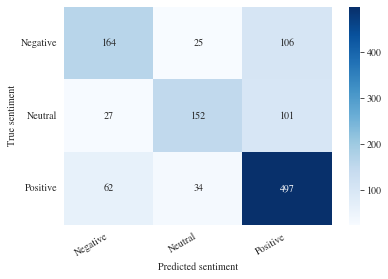

In [137]:
cm = confusion_matrix(labels[test_indices], test_pred)
df_cm = pd.DataFrame(cm, index=namesInLabelOrder, columns=namesInLabelOrder)
show_confusion_matrix(df_cm)

In [198]:
SVM_FT_STM_accuracy, SVM_FT_STM_precision, SVM_FT_STM_recall ,SVM_FT_STM_f1_score = evaluate_model1(test_x, test_labels, SVM_best_model)
h0=["Algorithm"]
h1=["SVM",SVM_FT_STM_accuracy,SVM_FT_STM_f1_score,SVM_FT_STM_precision,SVM_FT_STM_recall]

h0.append("Accuracy")
h0.append("F1 Measure")
h0.append("Precision")
h0.append("Recall")

from beautifultable import BeautifulTable
table = BeautifulTable()
table.column_headers = h0
table.append_row(h1)
print(table)

+-----------+----------+------------+-----------+--------+
| Algorithm | Accuracy | F1 Measure | Precision | Recall |
+-----------+----------+------------+-----------+--------+
|    SVM    |   0.69   |   0.609    |   0.681   |  0.55  |
+-----------+----------+------------+-----------+--------+


/usr/local/lib/python3.7/dist-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.column_headers' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTColumnCollection.header' instead.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.append_row' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTRowCollection.append' instead.
  warnings.warn(message, FutureWarning)


##Experiment 1 Results

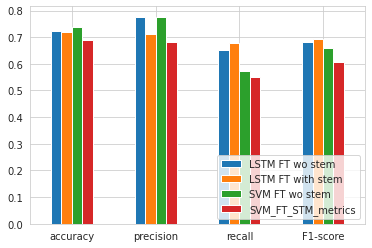

In [199]:
LSTM_FT_metrics = np.array([LSTM_FT_accuracy, LSTM_FT_precision, LSTM_FT_recall,LSTM_FT_f1_score])
LSTM_FT_STM_metrics = np.array([LSTM_FT_STM_accuracy, LSTM_FT_STM_precision, LSTM_FT_STM_recall,LSTM_FT_STM_f1_score])
SVM_FT_metrics = np.array([SVM_FT_accuracy, SVM_FT_precision, SVM_FT_recall ,SVM_FT_f1_score])
SVM_FT_STM_metrics = np.array([SVM_FT_STM_accuracy, SVM_FT_STM_precision, SVM_FT_STM_recall ,SVM_FT_STM_f1_score])
index = ['accuracy', 'precision', 'recall', 'F1-score']
df_metrics = pd.DataFrame({'LSTM FT wo stem': LSTM_FT_metrics, 'LSTM FT with stem': LSTM_FT_STM_metrics, 'SVM FT wo stem': SVM_FT_metrics, 'SVM_FT_STM_metrics': SVM_FT_STM_metrics }, index=index)
df_metrics.plot.bar(rot=0)
plt.legend(loc="lower right")
plt.show()